In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [132]:
#데이터 로드
data =pd.read_csv('./data/Advertising.csv', index_col=0)

In [133]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [134]:
data.shape

(200, 4)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## 시각화

<function matplotlib.pyplot.show(*args, **kw)>

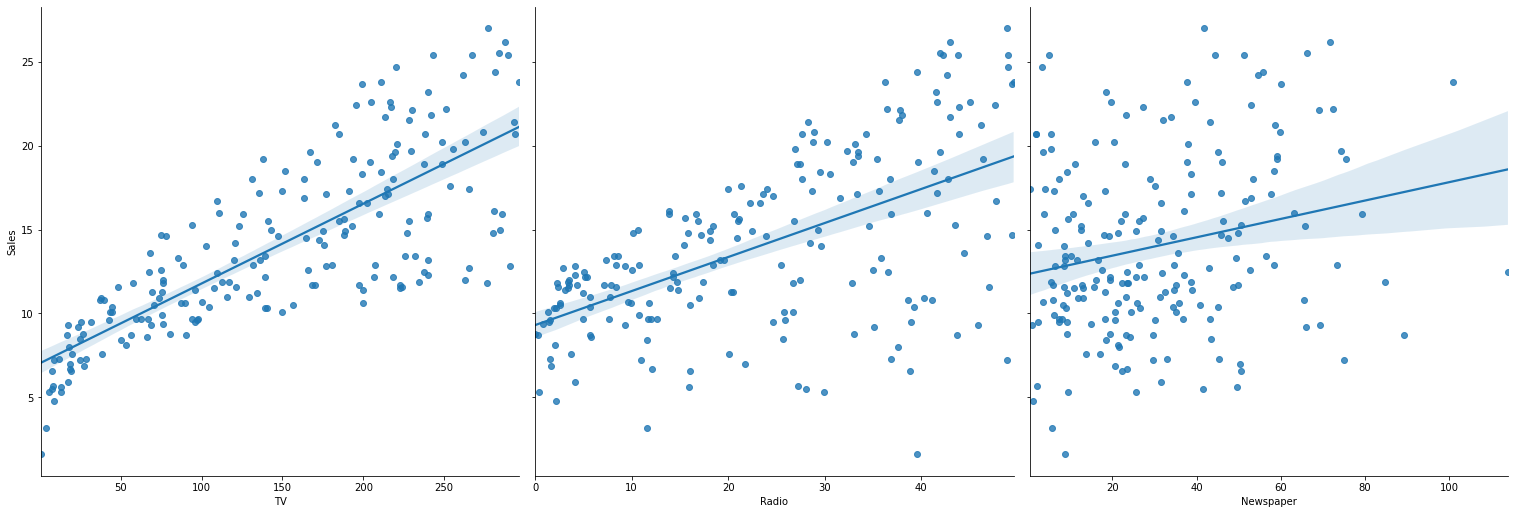

In [136]:
sns.pairplot(data, 
             x_vars=['TV','Radio','Newspaper'],
             y_vars='Sales', 
             palette='',
             kind="reg",
             height=7
)
plt.show

## model 학습 및 평가

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = data.iloc[:,:3]
y=data.iloc[:,3]

In [139]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [2]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error


In [142]:
model = Lasso()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
#테스트값을 주면 예측
pre = model.predict(X_test)
print("MSE : ", mean_squared_error(pre,y_test))

훈련 점수 :  0.9070229705018491
테스트 점수 :  0.860728727839721
MSE :  3.9254309985586335


In [143]:
model = Ridge()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
pre = model.predict(X_test)
print("MSE : ", mean_squared_error(pre,y_test))

훈련 점수 :  0.9072183327469391
테스트 점수 :  0.8576433389579591
MSE :  4.012394239227089


In [144]:
#가중치
model.coef_

array([0.04416232, 0.19899704, 0.00116411])

## 신문을 제외하고 분석

In [145]:
feature = ["TV","Radio"]

In [146]:
X = data[feature]
y = data.iloc[:,3]

In [147]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [148]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 2), (50, 2), (150,), (50,))

In [149]:
model = Lasso()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
#테스트값을 주면 예측
pre = model.predict(X_test)
print("MSE : ", mean_squared_error(pre,y_test))

훈련 점수 :  0.9070229705018491
테스트 점수 :  0.860728727839721
MSE :  3.9254309985586335


In [150]:
model = Ridge()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
pre = model.predict(X_test)
print("MSE : ", mean_squared_error(pre,y_test))

훈련 점수 :  0.9071991782377148
테스트 점수 :  0.8580925145907989
MSE :  3.9997339976309805


## 특성 확장 후 분석

In [157]:
#데이터 보존 (x2 바꿔도 x 안바뀜)
X2 = X.copy()
y2 = y.copy()

In [152]:
X2.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [153]:
"""TV , Radio, TVTV, TVRadio, RaRa"""

'TV , Radio, TVTV, TVRadio, RaRa'

In [154]:
#X2['TVTV']=X2['TV']*X2['TV']
#X2['TVRadio']=X2['TV']*X2['Radio']
#X2['RaRa']=X2['Radio']*X2['Radio']

In [165]:
col = X2.columns
print(col)

for i in range(col.size):
    for j in range(i,col.size):
        X2[col[i]+"*"+col[j]] = X2[col[i]]*X2[col[j]]

Index(['TV', 'Radio'], dtype='object')


In [166]:
X2.head()

,TV,Radio,TV*TV,TV*Radio,Radio*Radio
1,230.1,37.8,52946.01,8697.78,1428.84
2,44.5,39.3,1980.25,1748.85,1544.49
3,17.2,45.9,295.84,789.48,2106.81
4,151.5,41.3,22952.25,6256.95,1705.69
5,180.8,10.8,32688.64,1952.64,116.64


In [174]:
X_train, X_test, y_train, y_test=train_test_split(X2,y,random_state=0)

In [168]:
model = Lasso()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
#테스트값을 주면 예측
pre = model.predict(X_test)
print("MSE : ", mean_squared_error(pre,y_test))

훈련 점수 :  0.990194984053851
테스트 점수 :  0.9710967953812567
MSE :  0.8146513893944081


In [190]:
model = Ridge()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
pre = model.predict(X_test)
print("MSE : ", mean_squared_error(pre,y_test))

훈련 점수 :  0.9906445078761393
테스트 점수 :  0.971926889354791
MSE :  0.7912547723829829


## 파라메터 조절

In [227]:
model= Ridge()
param_grid={
    "alpha":[0.001,0.01,0.1,1,10,100,1000,10000,100000]
}
grid = GridSearchCV(model, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X_train, y_train)
print("최고 점수 : ", -grid.best_score_)
print("최고 매개 : ", grid.best_params_)

최고 점수 :  0.5188845510224593
최고 매개 :  {'alpha': 100}


In [223]:
model = Ridge(alpha=100)
model.fit(X_train, y_train)

print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ",model.score(X_test, y_test))
pre = model.predict(X_test)
print("RMSE : ",mean_squared_error(pre, y_test)**0.5)

훈련 점수 :  0.9906433897411817
테스트 점수 :  0.9719160314746654
RMSE :  0.8896970311328974


In [224]:
from sklearn.model_selection import cross_val_score

In [210]:
alpha_pa = [0,0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
for a in alpha_pa:
    model = Ridge(alpha=a)
    result = cross_val_score(model, X_train, y_train, cv=5)
    print("a : {},  \t SCORE : {}".format(a, result.mean()))

a : 0,  	 SCORE : 0.9889200495107829
a : 0.0001,  	 SCORE : 0.9889200495099006
a : 0.001,  	 SCORE : 0.9889200495019598
a : 0.01,  	 SCORE : 0.9889200494225351
a : 0.1,  	 SCORE : 0.9889200486265832
a : 1,  	 SCORE : 0.9889200404967096
a : 10,  	 SCORE : 0.9889199424088304
a : 100,  	 SCORE : 0.9889175040918048
a : 1000,  	 SCORE : 0.988845960697701


In [228]:
import sklearn
sklearn.__version__

'0.23.1'